In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_colwidth = 200

import matplotlib.pyplot as plt
import seaborn as sns

import os
import re

import pickle
import logging

logger = logging.getLogger()
logging.basicConfig(format='%(asctime)s - %(message)s', level=logging.INFO)

In [2]:
DATA_PATH      = './data/was'
OUTPUT_PATH    = './result'
ACCESS_FILE    = 'U11A_11_access.log'
ERROR_FILE     = 'U11A_11_error.log'

In [3]:
access_list = []

with open(os.path.join(DATA_PATH, ACCESS_FILE), 'r') as fp:
   lines = fp.readlines()
   for line in lines:
        line = re.sub(r'[\[\]\""]', '', line)
        line = line.split()
        if (len(line) == 9):
            access_list.append(line[:6] + ['-', '-'] + line[6:])
        else:
            access_list.append(line)

In [4]:
nums = list(map(lambda x: len(x), access_list))

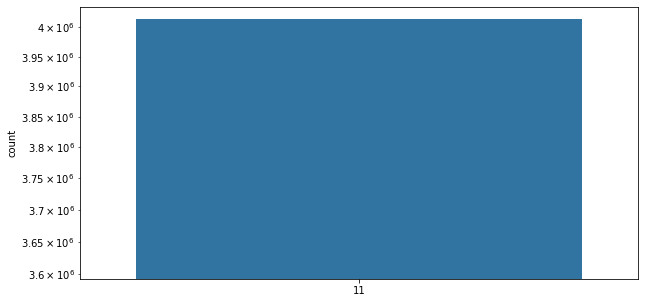

In [5]:
fig = plt.figure(figsize=(10,5))
plt.yscale('log')
sns.countplot(nums)
# plt.savefig('log_length.png')

In [6]:
access_list[50471:50473]

[['172.21.20.175',
  '-',
  '-',
  '03/Jun/2019:08:34:45',
  '+0900',
  '-',
  '-',
  '-',
  '408',
  '-',
  '0'],
 ['172.21.20.175',
  '-',
  '-',
  '03/Jun/2019:08:34:45',
  '+0900',
  '-',
  '-',
  '-',
  '408',
  '-',
  '0']]

In [7]:
access_list[0]

['172.23.18.45',
 '-',
 '-',
 '02/Jun/2019:23:55:01',
 '+0900',
 'GET',
 '/U11/U11A10APP/U11000000.mvc?ServiceName=U11010100-service&login=1&reloadFlag=Y',
 'HTTP/1.1',
 '200',
 '165861',
 '0']

In [8]:
test = access_list[50471]

In [9]:
np.where(np.isin(np.array(nums) ,9))

(array([], dtype=int64),)

In [10]:
access_list[32205]

['172.21.55.206',
 '-',
 '-',
 '03/Jun/2019:02:13:13',
 '+0900',
 'POST',
 '/U11/U11A10APP/U11000000.mvc?ServiceName=U11010100-service&login=1',
 'HTTP/1.1',
 '200',
 '175009',
 '3']

In [11]:
access_list[3589130]

['172.21.76.120',
 '-',
 '-',
 '03/Jun/2019:02:17:25',
 '+0900',
 'POST',
 '/U11/U11A10APP/U11000000.mvc?ServiceName=U11010100-service&login=1',
 'HTTP/1.1',
 '200',
 '176907',
 '6']

In [12]:
access_log = pd.DataFrame(access_list, columns = ['IP', '-', '-', 'datetime', 'timezone', 'RestAPI', 'target.js', 'version', 'status', '0', '1'])

In [13]:
%%time
access_log['datetime2'] = access_log.loc[:, 'datetime'].map(lambda x: pd.to_datetime(x, format='%d/%b/%Y:%H:%M:%S'))

CPU times: user 10min 9s, sys: 2.03 s, total: 10min 11s
Wall time: 10min 11s


In [14]:
access_log.head()

IP  -  -              datetime timezone RestAPI  \
0    172.23.18.45  -  -  02/Jun/2019:23:55:01    +0900     GET   
1  192.168.79.122  -  -  02/Jun/2019:23:55:02    +0900     GET   
2    172.23.18.45  -  -  02/Jun/2019:23:55:02    +0900    POST   
3  192.168.79.122  -  -  02/Jun/2019:23:55:02    +0900     GET   
4    172.23.18.45  -  -  02/Jun/2019:23:55:02    +0900     GET   

                                                                         target.js  \
0  /U11/U11A10APP/U11000000.mvc?ServiceName=U11010100-service&login=1&reloadFlag=Y   
1  /U11/U11A10APP/U11000000.mvc?ServiceName=U11010100-service&login=1&reloadFlag=Y   
2     /U11/U11A10APP/U11000000.json?ServiceName=U11010100-ajax-service&alertList=1   
3     /U11/U11A10APP/U11000000.json?ServiceName=U11010100-ajax-service&popupList=1   
4     /U11/U11A10APP/U11000000.json?ServiceName=U11010100-ajax-service&popupList=1   

    version status       0  1           datetime2  
0  HTTP/1.1    200  165861  0 2019-06-02 23:55:01  
1  HTTP/1.1    200  161005  0 2019-06-02 23:55:02  
2  HTTP/1.1    200      37  0 2019-06-02 23:55:02  
3  HTTP/1.1    200      59  0 2019-06-02 23:55:02  
4  HTTP/1.1    200      59  0 2019-06-02 23:55:02

## http status code showed in data

### Normal
- '200', OK
- '206', Partial Content
- '302', Found
- '304', Not Modified

### Client Error
- '400', Bad Request
- '403', Forbidden
- '404', Not Found
- '408', Request Timeout

### Server Error
- '500', Internel Server Error

In [15]:
labels = dict(zip(sorted(access_log['status'].unique()), ['Normal', 'Normal', 'Normal', 'Normal', 'C_Error', 'C_Error', 'C_Error', 'C_Error', 'S_Error']))

In [16]:
%%time
access_log['label'] = access_log.loc[:, 'status'].map(lambda x: labels[x])

CPU times: user 995 ms, sys: 40 ms, total: 1.04 s
Wall time: 1.03 s


In [17]:
%%time
access_log['date_ordinal'] = pd.to_datetime(access_log['datetime2']).apply(lambda date: date.toordinal())

CPU times: user 10.6 s, sys: 652 ms, total: 11.2 s
Wall time: 11.1 s


In [28]:
%%time
access_log['status'] = access_log['status'].astype('category')

CPU times: user 633 ms, sys: 140 ms, total: 773 ms
Wall time: 771 ms


In [29]:
access_log.head()

IP  -  -              datetime timezone RestAPI  \
0    172.23.18.45  -  -  02/Jun/2019:23:55:01    +0900     GET   
1  192.168.79.122  -  -  02/Jun/2019:23:55:02    +0900     GET   
2    172.23.18.45  -  -  02/Jun/2019:23:55:02    +0900    POST   
3  192.168.79.122  -  -  02/Jun/2019:23:55:02    +0900     GET   
4    172.23.18.45  -  -  02/Jun/2019:23:55:02    +0900     GET   

                                                                         target.js  \
0  /U11/U11A10APP/U11000000.mvc?ServiceName=U11010100-service&login=1&reloadFlag=Y   
1  /U11/U11A10APP/U11000000.mvc?ServiceName=U11010100-service&login=1&reloadFlag=Y   
2     /U11/U11A10APP/U11000000.json?ServiceName=U11010100-ajax-service&alertList=1   
3     /U11/U11A10APP/U11000000.json?ServiceName=U11010100-ajax-service&popupList=1   
4     /U11/U11A10APP/U11000000.json?ServiceName=U11010100-ajax-service&popupList=1   

    version status       0  1           datetime2   label  date_ordinal  
0  HTTP/1.1    200  165861  0 2019-06-02 23:55:01  Normal        737212  
1  HTTP/1.1    200  161005  0 2019-06-02 23:55:02  Normal        737212  
2  HTTP/1.1    200      37  0 2019-06-02 23:55:02  Normal        737212  
3  HTTP/1.1    200      59  0 2019-06-02 23:55:02  Normal        737212  
4  HTTP/1.1    200      59  0 2019-06-02 23:55:02  Normal        737212

In [20]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [21]:
sorted(access_log['status'].unique())

['200', '206', '302', '304', '400', '403', '404', '408', '500']

In [45]:
access_log['status'].value_counts()

200    3023565
304     910574
302      60952
404      16934
408        838
206        123
500         56
400         18
403         13
Name: status, dtype: int64

In [26]:
access_log['status'].value_counts(normalize=True)

200    0.753429
304    0.226902
302    0.015188
404    0.004220
408    0.000209
206    0.000031
500    0.000014
400    0.000004
403    0.000003
Name: status, dtype: float64

In [ ]:
[access_log['datetime2'].min(), access_log['datetime2'].max()]

2019-08-13 07:34:34,407 - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2019-08-13 07:34:34,597 - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2019-08-13 07:34:41,349 - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


CPU times: user 1min 45s, sys: 2.13 s, total: 1min 47s
Wall time: 1min 46s


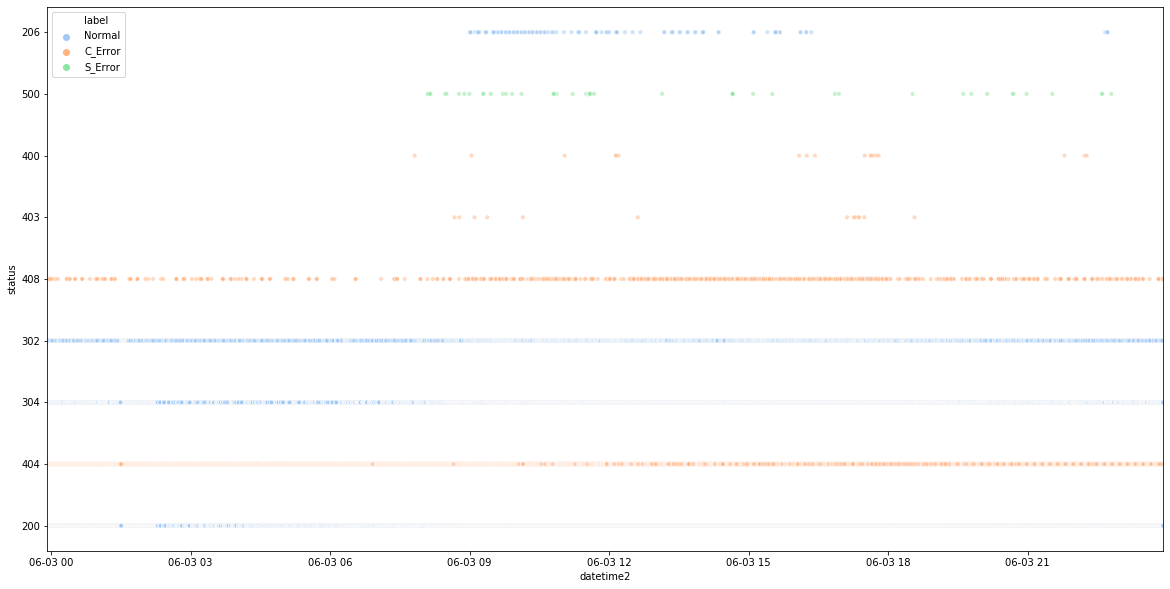

In [44]:
%%time
fig = plt.figure(figsize=(20,10))
sns.set_palette('pastel')
ax = sns.scatterplot(x='datetime2', y='status', data=access_log, hue='label', s=20, alpha=.5)
ax.set_yticks(sorted(access_log['status'].unique()))
plt.xlim([access_log['datetime2'].min(), access_log['datetime2'].max()])
plt.savefig('log_label.png')